# <span style="color:purple"> Outlier Detection

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [238]:
df= pd.read_csv('C:\\Users\\deepz\\Downloads\\house_price.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [240]:
df.describe(include='all')

,location,size,total_sqft,bath,price,bhk,price_per_sqft
count,13200,13200,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
unique,241,31,NaN,NaN,NaN,NaN,NaN
top,other,2 BHK,NaN,NaN,NaN,NaN,NaN
freq,2872,5192,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,NaN,NaN,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,NaN,NaN,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,NaN,NaN,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,NaN,NaN,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,NaN,NaN,1672.000000,3.000000,120.000000,3.000000,7.317000e+03


In [241]:
df.notnull

<bound method DataFrame.notnull of                        location       size  total_sqft  bath   price  bhk  \
0      Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1              Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2                   Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3            Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                      Kothanur      2 BHK      1200.0   2.0   51.00    2   
...                         ...        ...         ...   ...     ...  ...   
13195                Whitefield  5 Bedroom      3453.0   4.0  231.00    5   
13196                     other      4 BHK      3600.0   5.0  400.00    4   
13197     Raja Rajeshwari Nagar      2 BHK      1141.0   2.0   60.00    2   
13198           Padmanabhanagar      4 BHK      4689.0   4.0  488.00    4   
13199              Doddathoguru      1 BHK       550.0   1.0   17.00    1   

       price_per_sqft  
0               

In [242]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [243]:
df.duplicated().sum()

1049

<span style='color:red'>***Duplicates detected.***

In [244]:
df=df.drop_duplicates()

In [245]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [246]:
df.shape

(12151, 7)

<span style="color:red">***Detecting the outliers, removing it using different methods.***

## 1.MEAN METHOD

In [247]:
df.price_per_sqft.min()

267

In [248]:
df.price_per_sqft.max()

12000000

In [249]:
df.price_per_sqft.mean()

8132.641840177763

In [250]:
df.price_per_sqft.median()

5500.0

<span style='color:blue'>***There is a significant difference between mean and median. Indicating presence of outliers.***

C:\Users\deepz\AppData\Local\Temp\ipykernel_10800\3254988551.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'],color='r')


Text(0.5, 1.0, 'Distribution of price per sqft with Outliers')

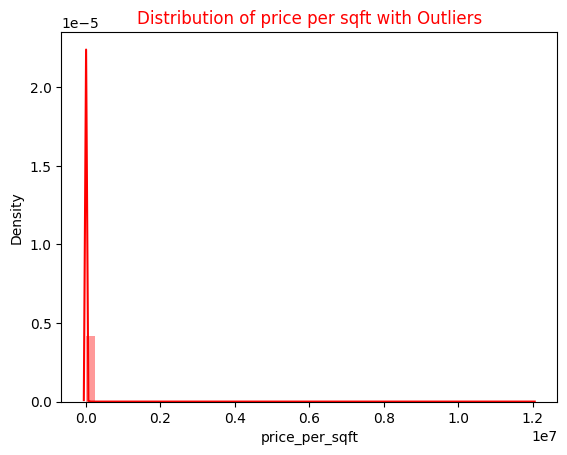

In [251]:
sns.distplot(df['price_per_sqft'],color='r')
plt.title('Distribution of price per sqft with Outliers',color='r')

<Axes: ylabel='price_per_sqft'>

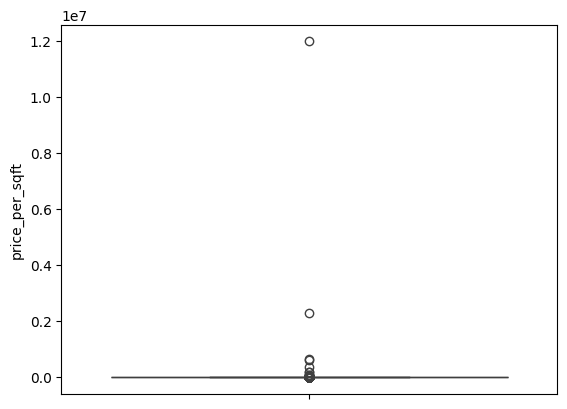

In [252]:
sns.boxplot(df['price_per_sqft'])

<span style='color:green'>***Quantile() to find out the percentiles.***

In [253]:
df.price_per_sqft.quantile([0.05,0.1,0.25,0.5,0.75,0.90,0.92,0.94,0.96,0.98,0.99])

0.05     3150.0
0.10     3513.0
0.25     4312.0
0.50     5500.0
0.75     7461.0
0.90    11904.0
0.92    13129.0
0.94    14695.0
0.96    16666.0
0.98    20000.0
0.99    24000.0
Name: price_per_sqft, dtype: float64

<span style='color:magenta'>***There is an significant variation between 98th and 99th percentile, indicating presence of outliers.***

In [254]:
df[df.price_per_sqft>df.price_per_sqft.quantile(0.95)] #outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
69,other,3 Bedroom,500.0,3.0,100.0,3,20000
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13097,other,1 BHK,250.0,2.0,40.0,1,16000
13141,other,3 Bedroom,2000.0,2.0,360.0,3,18000
13142,other,2 BHK,1140.0,1.0,185.0,2,16228


In [255]:
#Data without outliers
df1=df[df.price_per_sqft<df.price_per_sqft.quantile(0.95)]
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


C:\Users\deepz\AppData\Local\Temp\ipykernel_10800\2713776560.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['price_per_sqft'],color='r')


Text(0.5, 1.0, 'Distribution of Price per Sqft without outliers')

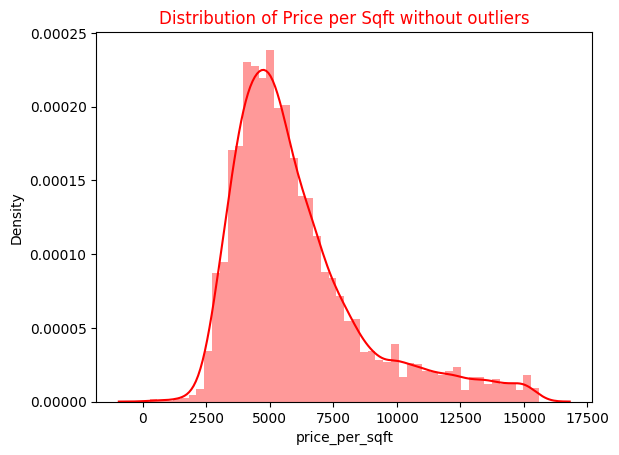

In [256]:
sns.distplot(df1['price_per_sqft'],color='r')
plt.title('Distribution of Price per Sqft without outliers',color='r')

<Axes: ylabel='price_per_sqft'>

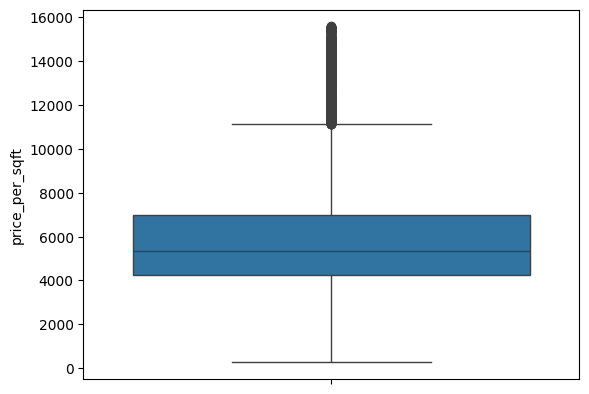

In [257]:
sns.boxplot(df1['price_per_sqft'])

In [258]:
print("Before removing outliers:",len(df))
print("After removing outliers:",len(df1))
print("Outliers:",len(df)-len(df1))

Before removing outliers: 12151
After removing outliers: 11542
Outliers: 609


<span style='color:indigo'>***After removing the ouliers using the mean function,we have achieved a bell shaped curve in the distplot, and we have removed 609 ouliers from the dataset.***

## 2.PERCENTILE METHOD

In [259]:
upper_limit=df['price_per_sqft'].quantile(0.95)
lower_limit=df['price_per_sqft'].quantile(0.05)

In [260]:
print("Upper Limit:",upper_limit)
print("Lower Limit:",lower_limit)

Upper Limit: 15600.0
Lower Limit: 3150.0


C:\Users\deepz\AppData\Local\Temp\ipykernel_10800\3611621828.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'],color='g')


Text(0.5, 1.0, 'Distribution of Price Per Sqft with Outliers')

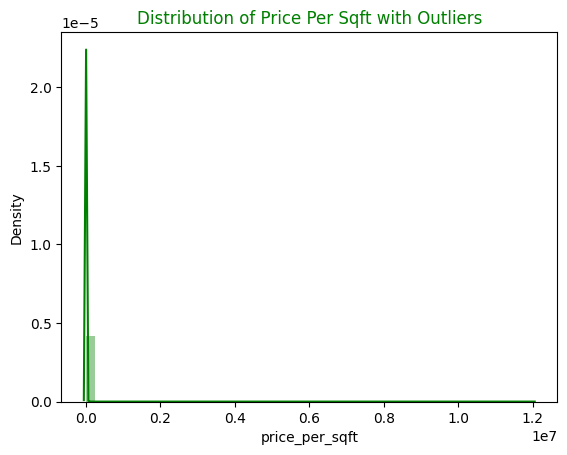

In [261]:
sns.distplot(df['price_per_sqft'],color='g')
plt.title('Distribution of Price Per Sqft with Outliers',color='g')

<Axes: ylabel='price_per_sqft'>

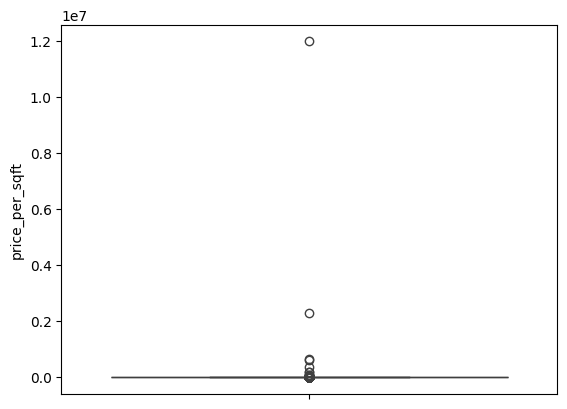

In [262]:
sns.boxplot(df['price_per_sqft'])

In [263]:
#finding outliers
df.loc[(df['price_per_sqft']>upper_limit) | (df['price_per_sqft']<lower_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.00,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.00,3,3030
45,HSR Layout,8 Bedroom,600.0,9.0,200.00,8,33333
...,...,...,...,...,...,...,...
13121,Electronic City Phase II,3 BHK,1651.0,3.0,49.53,3,3000
13141,other,3 Bedroom,2000.0,2.0,360.00,3,18000
13142,other,2 BHK,1140.0,1.0,185.00,2,16228
13155,Kothannur,4 Bedroom,1600.0,4.0,45.00,4,2812


In [264]:
#deleting the outliers
df2=df.loc[(df['price_per_sqft']<=upper_limit) & (df['price_per_sqft']>=lower_limit)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [265]:
print("Before removing outliers:",len(df))
print("After removing outliers:",len(df2))
print("Outliers:",len(df)-len(df2))

Before removing outliers: 12151
After removing outliers: 10940
Outliers: 1211


C:\Users\deepz\AppData\Local\Temp\ipykernel_10800\1263576762.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['price_per_sqft'],color='g')


Text(0.5, 1.0, 'Distribution of Price Per Sqft without outliers')

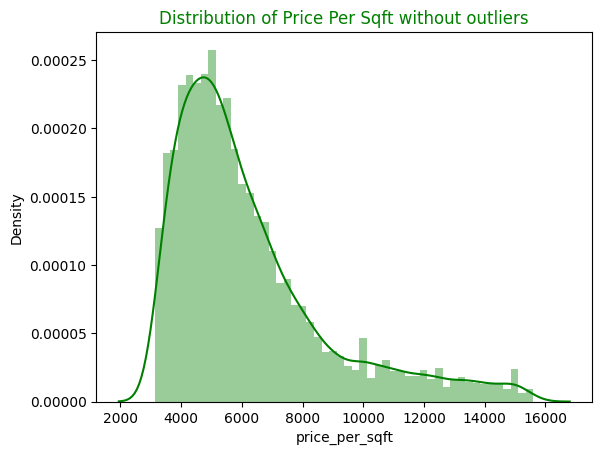

In [266]:
sns.distplot(df2['price_per_sqft'],color='g')
plt.title('Distribution of Price Per Sqft without outliers',color='g')

<Axes: ylabel='price_per_sqft'>

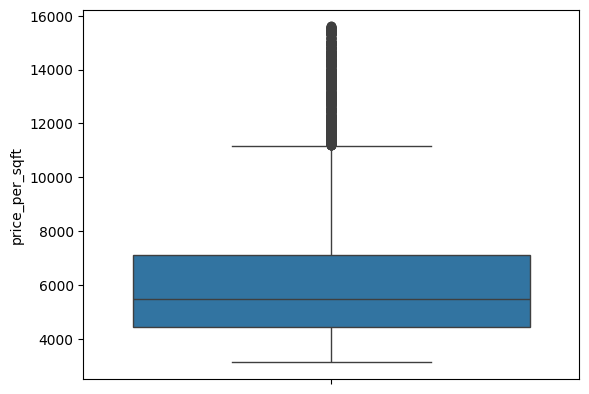

In [267]:
sns.boxplot(df2['price_per_sqft'])

<span style='color:indigo'>***After applying the percentile technique to remove outliers, our distplot nearly formed a bell curve, and we managed to get rid of 1211 outliers from the dataset.***

In [268]:
#CAPPING -cahne the outliers to upper or lower values
new_df2=df.copy()
new_df2.loc[(new_df2['price_per_sqft']>upper_limit),'price_per_sqft']=upper_limit
new_df2.loc[(new_df2['price_per_sqft']<lower_limit),'price_per_sqft']=lower_limit

<Axes: ylabel='price_per_sqft'>

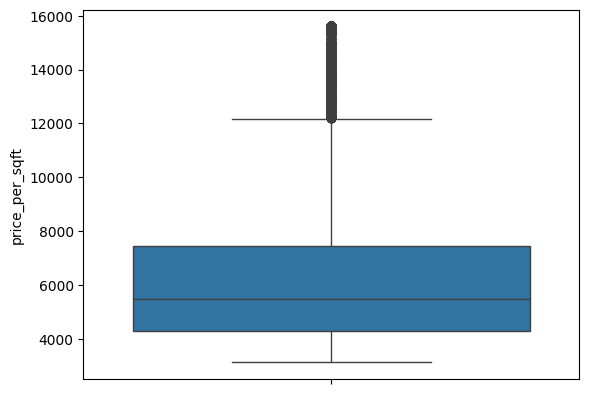

In [269]:
sns.boxplot(new_df2['price_per_sqft'])

## 3.IQR METHOD

C:\Users\deepz\AppData\Local\Temp\ipykernel_10800\373823651.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


Text(0.5, 1.0, 'Distribution of price Per Sqft with outliers')

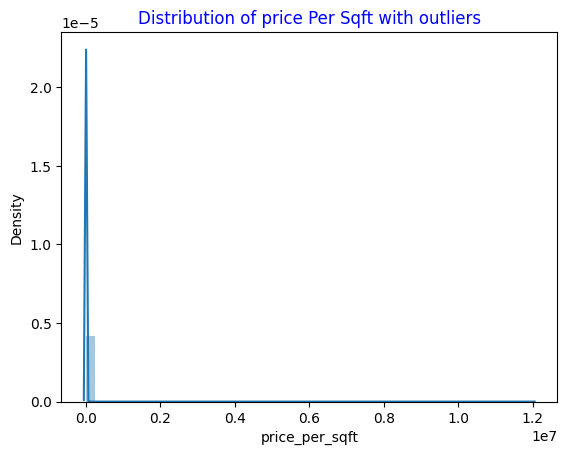

In [270]:
sns.distplot(df['price_per_sqft'])
plt.title('Distribution of price Per Sqft with outliers',color='b')

<Axes: ylabel='price_per_sqft'>

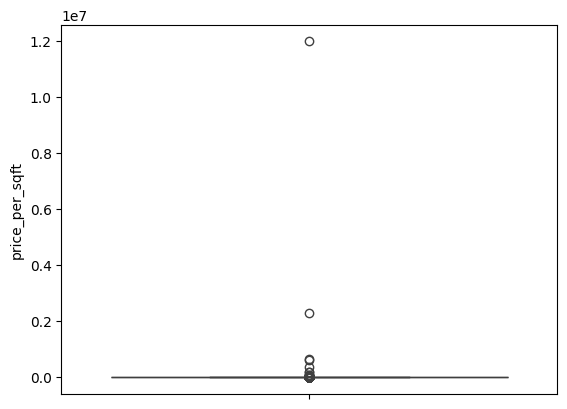

In [271]:
sns.boxplot(df['price_per_sqft'])

In [272]:
Q1=df.price_per_sqft.quantile(0.25)
Q3=df.price_per_sqft.quantile(0.75)
IQR=Q3-Q1
print("Q1=",Q1)
print("Q3=",Q3)
print("IQR=",IQR)

Q1= 4312.0
Q3= 7461.0
IQR= 3149.0


In [273]:
lower_whisker=Q1-1.5*IQR
upper_whisker=Q3+1.5*IQR
print('Lower Whisker=',lower_whisker)
print('Upper Whisker=',upper_whisker)

Lower Whisker= -411.5
Upper Whisker= 12184.5


In [274]:
#finding otuliers
df[(df.price_per_sqft<-411.5) | (df.price_per_sqft>12184.5)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13114,other,3 BHK,1903.0,2.0,293.0,3,15396
13141,other,3 Bedroom,2000.0,2.0,360.0,3,18000
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571


In [275]:
#df without outliers
df3=df[(df.price_per_sqft>-411.5) & (df.price_per_sqft<12184.5)]
df3

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [276]:
print('Before removing outliers:',len(df))
print('After removing outliers',len(df3))
print('Outliers:',len(df)-len(df3))

Before removing outliers: 12151
After removing outliers 11009
Outliers: 1142


C:\Users\deepz\AppData\Local\Temp\ipykernel_10800\1727763733.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3['price_per_sqft'],color='y')


Text(0.5, 1.0, 'Distribution of Price Per Sqft without outliers')

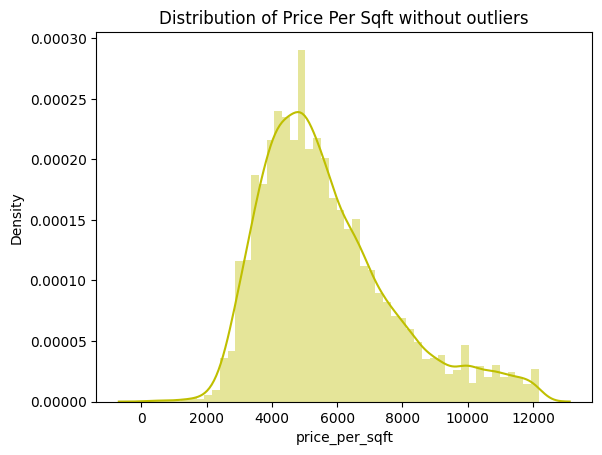

In [277]:
sns.distplot(df3['price_per_sqft'],color='y')
plt.title('Distribution of Price Per Sqft without outliers')

<Axes: ylabel='price_per_sqft'>

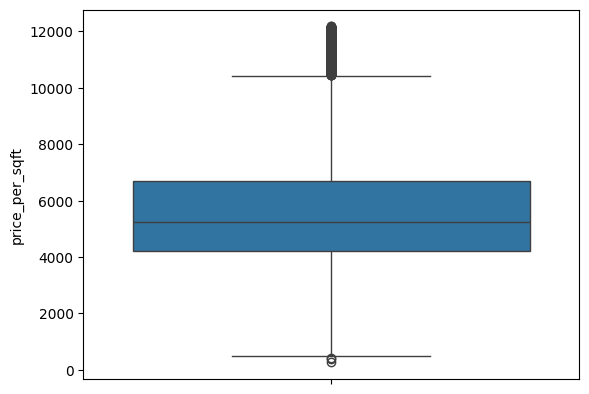

In [278]:
sns.boxplot(df3['price_per_sqft'])

<span style='color:blue'>***Using IQR method to eliminate the outliers,we approached a bell shaped curve in the distplot and removed a total of 1142 outliers  from the dataset.***

## 4.NORMAL DISTRIBUTION

In [279]:
df.price_per_sqft.describe()

count    1.215100e+04
mean     8.132642e+03
std      1.112329e+05
min      2.670000e+02
25%      4.312000e+03
50%      5.500000e+03
75%      7.461000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [280]:
m=df.price_per_sqft.mean()
m

8132.641840177763

In [281]:
s=df.price_per_sqft.std()
s

111232.90089570847

In [282]:
#-3sigma
m-3*s

-325566.06084694766

In [283]:
#+3sigma
m+3*s

341831.3445273032

In [284]:
#finding outliers
df[(df.price_per_sqft<-325566.06084694766) | (df.price_per_sqft>341831.3445273032)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [285]:
#data without outliers
df4=df[(df.price_per_sqft>-325566.06084694766) & (df.price_per_sqft<341831.3445273032)]
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [286]:
print("Before removing outliers:",len(df))
print("After removing outliers:",len(df4))
print("Outliers:",len(df)-len(df4))

Before removing outliers: 12151
After removing outliers: 12146
Outliers: 5


C:\Users\deepz\AppData\Local\Temp\ipykernel_10800\4222713904.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df4['price_per_sqft'],color='m')


<Axes: xlabel='price_per_sqft', ylabel='Density'>

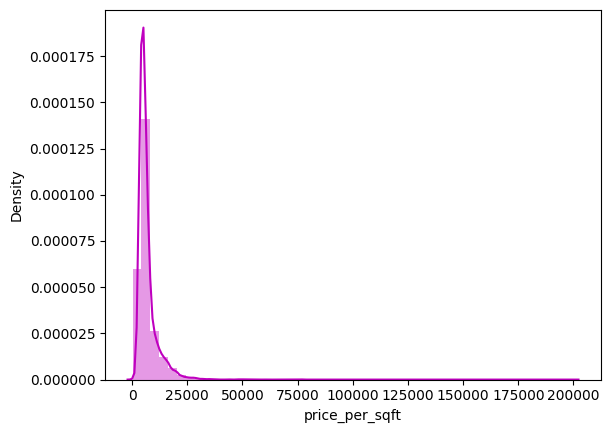

In [287]:
sns.distplot(df4['price_per_sqft'],color='m')

<Axes: ylabel='price_per_sqft'>

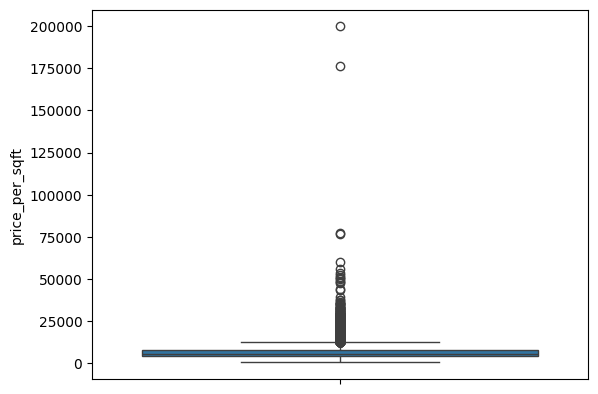

In [288]:
sns.boxplot(df4['price_per_sqft'])

<span style='color:indigo'>***Using the Normal Distributon Method, before removing outliers, there were 12151 data rows. After removing the outliers, there were 12146 data rows.5 outliers are identified.***

## 5.ZSCORE METHOD

In [289]:
m=df.price_per_sqft.mean()
m

8132.641840177763

In [290]:
s=df.price_per_sqft.std()
s

111232.90089570847

In [291]:
lower_limit=m-3*s
lower_limit

-325566.06084694766

In [292]:
upper_limit=m+3*s
upper_limit

341831.3445273032

In [293]:
#data without outliers
df5=df[(df.price_per_sqft>lower_limit) & (df.price_per_sqft<upper_limit)]
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [294]:
print("Before Removing Outliers:",len(df))
print("After Removing Outliers:",len(df5))
print("Outliers:",len(df)-len(df5))

Before Removing Outliers: 12151
After Removing Outliers: 12146
Outliers: 5


C:\Users\deepz\AppData\Local\Temp\ipykernel_10800\546888992.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df5['price_per_sqft'],color='b')


<Axes: xlabel='price_per_sqft', ylabel='Density'>

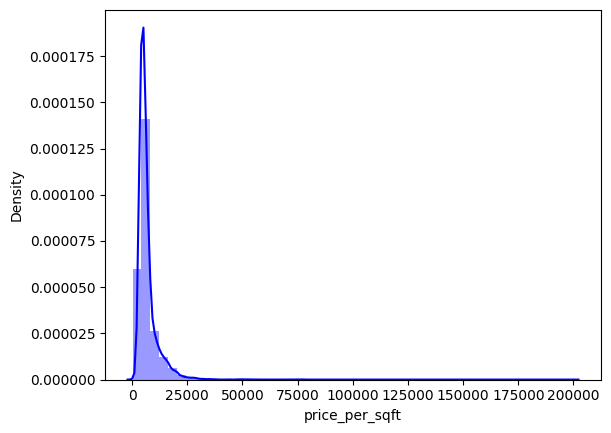

In [295]:
sns.distplot(df5['price_per_sqft'],color='b')

<Axes: ylabel='price_per_sqft'>

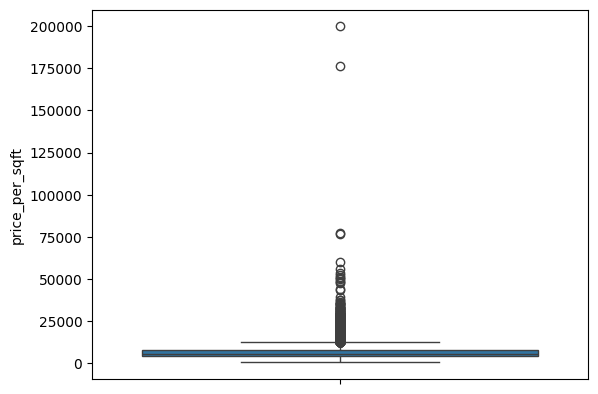

In [296]:
sns.boxplot(df5['price_per_sqft'])

<span style='color:indigo'>***using the zscore method, there were 12,151 data rows before removing outliers, and 12,146 data rows after removal, indicating a total of 5 outliers.***

<span style='color:red'>***We identified the same outliers using both the normal distribution and z-score method, indicating same process in our outlier removal approach.***

## <span style='color:green'>Correlation between all the numerical columns

In [297]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [298]:
#finding the numerical columns
#checking the dataset and selecting the numerical columns
num_col=df.select_dtypes(include=['int', 'float']).columns
num_col

Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')

In [299]:
#compute correlation mathrix
corre_matrix=df[num_col].corr()

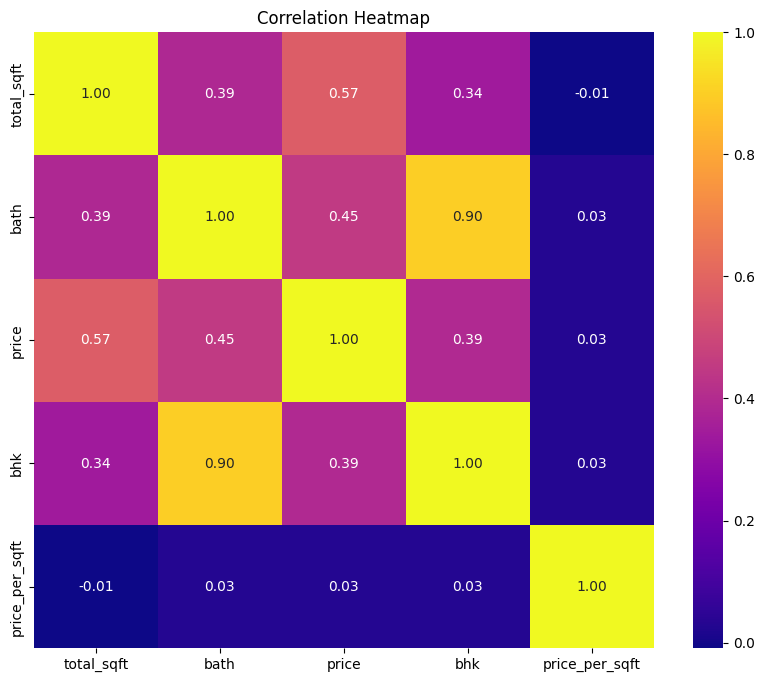

In [300]:
#plotting heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corre_matrix, annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

- <span style='color:indigo'>***Firstly, there seems to be a very weak negative correlation (-0.01) between Total Sqft and Price Per Sqft, implying that there's almost no linear relationship between these two variables.***

- <span style='color:indigo'>***However, Total Sqft shows moderate positive correlations with other key variables such as BHK (0.35), Price (0.57), and Bath (0.39), indicating that as the total square feet increases, the number of bedrooms, the property price, and the number of bathrooms tend to increase as well, though not in a perfectly linear manner.***

- <span style='color:indigo'>***Bath exhibits a strong positive correlation (0.90) with BHK, suggesting a strong linear relationship between the number of bathrooms and the number of bedrooms. Additionally, Bath also demonstrates moderate positive correlations with Price (0.46) and Total Sqft (0.39), indicating that properties with more bathrooms tend to command higher prices and have larger square feet.***

- <span style='color:indigo'>***Price also exhibits moderate positive correlations with BHK (0.40) and Total Sqft (0.57), indicating that both the number of bedrooms and the total square footage have a positive impact on property prices, though again, not in a perfectly linear manner.***

- <span style='color:indigo'>***Overall, these correlation coefficients provide valuable insights into how different factors are interrelated within our dataset, aiding in better understanding and potentially predicting property prices based on their characteristics.***

In [ ]:
#plot scatterplot
sns.pairplot(df)
plt.show()